In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv("flightData_0_deg_raw.csv")

Alt = data["Altitude"]
Acc_Z = data["AccX"]
Time = data["Time"].div(1000)

# import raw data to calculate sensor covariance from
raw_data = pd.read_csv("flightData_0_deg_raw.csv")
cov_mat = raw_data.iloc[200:1200][["Altitude", "AccX"]].cov()
print(cov_mat)

          Altitude      AccX
Altitude  0.092852 -0.055174
AccX     -0.055174  0.460889


In [52]:
def diff(X, T):
    V = []
    for i in range(1, len(X)):
        V.append((X[i]-X[i-1])/(T[i]-T[i-1]))
    return V

def integrate(X, T):
    V = [0]
    for i in range(1, len(X)):
        V.append(V[-1] + 0.5*(T[i]-T[i-1])*(X[i-1] + X[i]))
    return V

V_Baro = diff(Alt.tolist(), Time.tolist())
V_Acc = integrate(Acc_Z.tolist(), Time.tolist())


In [53]:
# Kalman Filter
def getF(delta_T):
    return np.array([[1, delta_T, 0.5*delta_T**2], [0, 1, delta_T], [0, 0, 1]])

Alt_pred = []
Vel_pred = []
Acc_pred = []

C = np.array([[1, 0, 0], [0, 0, 1]])
# State Vector
Xk = np.array([[0], [0], [0]])
# State Estimate Covariance
Pk = np.array([[0, 0, 0], [0, 0, 0], [0, 0, 0]])
# Sensor Covariance
R = np.array([[0.0929, 0], [0, 0.4609]])
# Model Covariance
Q = np.array([[0.0000001, 0, 0], [0, 0, 0], [0, 0, 0.1]])
for i in range(1, len(Time)):
    delta_T = Time[i] - Time[i-1]
    Y = np.array([[Alt[i]], [Acc_Z[i]]])
    F = getF(delta_T)
    Xkp_min = F.dot(Xk)
    Ykp_min = C.dot(Xkp_min)
    Pkp_min = F.dot(Pk).dot(np.transpose(F)) + Q
    K = Pkp_min.dot(np.transpose(C)).dot(np.linalg.inv(C.dot(Pkp_min).dot(np.transpose(C)) + R))
    Xk = Xkp_min + K.dot(Y - Ykp_min)
    Pk = (np.eye(3) - K.dot(C)).dot(Pkp_min)
    
    print(str(Xk[0][0])+','+str(Xk[1][0])+','+str(Xk[2][0]))
    
    Alt_pred.append(Xk[0][0])
    Vel_pred.append(Xk[1][0])
    Acc_pred.append(Xk[2][0])



1.2917101273303256e-07,0.0,0.08557675164913532
-0.00013110281550120267,-0.007115746514557476,-0.5306456114719227
-0.000981711257964828,-0.03473357046775936,-0.8167972205358807
-0.0025466072299212424,-0.05880187157718335,-0.68557326046394
-0.004622735658055698,-0.07461225494667005,-0.5146657221949369
-0.007501678888899224,-0.08997670435390297,-0.45536724974466336
-0.01068322630658731,-0.09809222045888862,-0.30619207634387224
-0.013703630668651396,-0.10070433433762253,-0.1928278381198682
-0.017290760198381737,-0.1086939871800117,-0.2505211882328357
-0.03089216118858435,-0.24803098977358873,-2.393362288232261
-0.0364304062711501,-0.2768479715852492,-1.517801502870058
-0.04282391577467906,-0.283047976174942,-0.8181380451425346
-0.05211267489029583,-0.28244353768412034,-0.38644810578424726
-0.05796527281054249,-0.26117523342802584,-0.021672384162318814
-0.06315884445592099,-0.24306394989256386,0.04232992763588188
-0.06798616597221356,-0.24574004524298598,-0.29073645115605756
-0.069987295211

0.7827420123970754,0.15087708049330478,0.1736825042661484
0.7885561985436649,0.15734361364734667,0.17233281742243842
0.7950498704312458,0.16617621391867124,0.2047906383507898
0.7982367140530922,0.17102147206744658,0.21379582712715486
0.7990501385095335,0.17309647953595084,0.2155189391652183
0.8024256351723715,0.17721508476052994,0.20572232021386666
0.805332441015901,0.1800589019218359,0.1921302625503465
0.8071638375361831,0.18083220044438808,0.17238036789903957
0.8046414828479385,0.1760060398408157,0.148352915837342
0.8059662070488072,0.1752621991105887,0.13731020864644183
0.8069663176785353,0.17344329120082902,0.11925241469235298
0.8009504867066697,0.16296254031658258,0.08868269598979298
0.7959375896310603,0.15499522114267106,0.09543117284317389
0.7921255233932989,0.1496561419292227,0.11826284853875375
0.7889309745237228,0.14292840574082583,0.08837367669244604
0.7879177165147713,0.1401794228330171,0.09939691986442378
0.7868839489532573,0.13767292536160786,0.10636029563598465
0.7890365

0.5372761241472627,0.11035115971160084,0.5285898434411118
0.5350887553800494,0.10632795593717384,0.24017545785501232
0.5328439081162752,0.10142538013111257,0.11379849193828392
0.5338649537052051,0.10872559086595723,0.20802414419633058
0.5271414846021261,0.09846213483612723,0.1003146789682987
0.5202660617983071,0.07459777350493238,-0.17443200090804856
0.5160152618719747,0.06446659458823799,-0.1180788598701313
0.5047102000437909,0.04465739510855639,-0.1350118350530606
0.4949323583349125,0.02501273260268866,-0.18238411953460673
0.4835061630730899,-0.010111443725893239,-0.4562476444483221
0.4806172722919608,-0.014986249269132687,-0.20283535930089236
0.4811511407926133,-0.014718649646434063,-0.08708181700586975
0.47901038632171394,-0.01919102454390498,-0.08092754177443502
0.4806916343975605,-0.019470946309149324,-0.08034351415225333
0.4828882206510638,-0.019847956096344644,-0.08729865645919593
0.4951594098387462,0.1376875165033262,2.2672819113350062
0.498733288411375,0.17958107437329793,1.6

0.41869782311247333,0.006176100908660755,-0.7683319226728194
0.418838732416051,-0.01785498737547266,-0.6875894270125362
0.41674056632778134,-0.028374930049499404,-0.40398141654331676
0.413203675741391,-0.02815517685229807,-0.10335608483861031
0.4087042779636726,-0.017156956952496704,0.2154052807178301
0.4068215491227317,0.0001890427265861666,0.3980685909721173
0.40656019466227905,-0.006247774460920813,0.036522015840109834
0.4001094507756231,-0.038021646636254555,-0.4174352985806076
0.39323297351723085,-0.04839757142363751,-0.24150246155647082
0.3834816172616186,-0.12899531450625876,-1.3283547266923752
0.3806940822560364,-0.1251406941634572,-0.44530254942975833
0.3747394780364744,-0.11396188655750586,0.04820895015155424
0.3719890821625639,-0.10307669326473147,0.17466790304813104
0.36594468367886707,-0.1347445475338534,-0.4223499478761509
0.36311103399087974,-0.14684272518047892,-0.41015821576942246
0.36060081559043267,-0.1490279885567617,-0.24345536293351225
0.3624514542182736,-0.148254

0.4986971126479002,-0.11197568642430099,-0.06713616069846128
0.5002705847885982,-0.10866574363801176,-0.07128133864369078
0.5025382345323013,-0.10432972066686193,-0.06643295384430355
0.5100211584361265,-0.09520844287426689,-0.07391019662500094
0.5156754299383852,-0.08848621954664551,-0.07882584804606271
0.5236884822087954,-0.07969242929662403,-0.0817516901093806
0.5260248366164617,-0.07683166891492421,-0.07685087614051432
0.52521550967495,-0.07711266055399846,-0.0704079586715142
0.5243099928359609,-0.07735837453007677,-0.06633613946975019
0.5203549727383855,-0.0811830321837253,-0.07147988895118995
0.5173716797605373,-0.08351012857282163,-0.07080432284509451
0.5201010867991005,-0.0799045452576075,-0.06981796300904328
0.5243608725203547,-0.07483423311756773,-0.0690772202079508
0.5276576267260065,-0.07096643723974182,-0.06876065975946982
0.5331237629430148,-0.06450930857707896,-0.06095650172929091
0.5383726071606536,-0.05908450765635068,-0.06719759161375614
0.541079619937068,-0.0564241048

0.5065878462339596,-0.058809593362556284,-0.07020888457758126
0.5077935891987625,-0.05757881525601456,-0.06605276349799563
0.5097239028405892,-0.05579111255259907,-0.06705019709052279
0.50761817368795,-0.058578002325523605,-0.07181645560881438
0.5056334488084239,-0.060515067684362524,-0.06370835437740473
0.5046499539628564,-0.06164254018016641,-0.06589516343546724
0.5044535458981987,-0.06236301061409017,-0.07458231862122508
0.5027359389482193,-0.06413127075567342,-0.06912730434816362
0.49936872115919223,-0.06792341153541863,-0.07322975928809139
0.49619807224843426,-0.07142023744319252,-0.07578732718517336
0.4976963029077234,-0.07011355278028342,-0.08057442574020322
0.49682034855451296,-0.07099698423963408,-0.07645256935423568
0.4936049795279824,-0.0744669362574815,-0.07779773230869011
0.49214322999629767,-0.07619338406188048,-0.08214454881656014
0.490912652688514,-0.07723087187417904,-0.07748240042353916
0.49435610415835457,-0.07322842831823666,-0.07404357426433911
0.4976583858932615,-

1.075459362607027,0.0067816971526522786,-0.0800327331913453
1.077546911834608,0.005869914295531674,-0.0761201722688388
1.0771488378466834,0.0015853301419581777,-0.07393188464300823
1.065677204246747,-0.013245643304647376,-0.07749119003385771
1.0593513352053938,-0.02176233639848486,-0.07165964131481084
1.0508228172391378,-0.032337563526473115,-0.06817662044744659
1.0480629236694259,-0.036899841581902584,-0.07640426516142901
1.045363782809516,-0.041546108183847,-0.0852593164868608
1.0465075923205576,-0.04195246825308085,-0.08672798601821247
1.0483007211760296,-0.04150209064679541,-0.08387967610610576
1.0493781805204594,-0.041208917969230596,-0.07479505349427445
1.051007096480849,-0.0409205513108792,-0.08009469120614131
1.0540483662500402,-0.03883930907398608,-0.07589350924186368
1.0553637925083716,-0.0386249388121222,-0.07341724676677884
1.055159539956452,-0.039893683155239903,-0.07202915785206153
1.0564280134583433,-0.03935536271287886,-0.06730096334302742
1.0582931930019108,-0.03880766

0.8117317803918438,-0.10201037728865259,-0.07759366386054069
0.8117871021741542,-0.10055133586717337,-0.07434462411304735
0.8149317136964157,-0.09580899900452214,-0.07194891612784239
0.8198115305829898,-0.08949572648562638,-0.07032545908370828
0.8260543629091829,-0.08196936470301633,-0.06920334551267274
0.8257458450861861,-0.08162299162959574,-0.07274849337653062
0.8270889213887758,-0.07933143698562163,-0.0675095230812477
0.8315328660894544,-0.07425137153330974,-0.07126742427373278
0.8343269406774377,-0.07141431278358978,-0.07758217875606169
0.8369758853723563,-0.06826118568128024,-0.07050639114854952
0.8410838358627365,-0.0642519043581303,-0.07701596153209239
0.8489382384042963,-0.05545781477065737,-0.06226629594410174
0.8602913190261974,-0.043757605198888154,-0.06371278441799108
0.870362168951407,-0.03415381709871772,-0.06847304841765352
0.8761061269448135,-0.02937308246116231,-0.06826616118616627
0.8768551464410148,-0.030057081057372655,-0.0686916774614368
0.8783140830810625,-0.0299

1.128688218785059,-0.05376453747859966,-0.08211575678203818
1.1292214607879922,-0.05380740696711655,-0.07738875565197519
1.1305142635186007,-0.052757440750757945,-0.07064875886362068
1.1262941726202087,-0.05813370856039904,-0.07801618761945517
1.1252416197266577,-0.059647595380907026,-0.0749304848353205
1.1183548308280473,-0.06676246820267137,-0.06618722361015211
1.1108955304094814,-0.07450475199367791,-0.06809500943063512
1.109611794036109,-0.07522003504660867,-0.06492976725530049
1.104760443495699,-0.07986541450997127,-0.06701278984036917
1.0987776357443837,-0.08559080323216058,-0.0684333511207856
1.095062189923325,-0.08866079273133116,-0.0690545516521908
1.0886023855770648,-0.09478145536488022,-0.07706361316685648
1.0877683677928212,-0.0950714793360686,-0.08155964056318565
1.0855017320149905,-0.09648347431207924,-0.07716007968565235
1.0856872426763153,-0.09543882489061399,-0.07784297141114069
1.0848706324424302,-0.09542123221443337,-0.07834681246244961
1.0917148968826271,-0.08690409

1.194470357895899,0.00227032134362684,-0.08200500010769325
1.1877609685428339,-0.008127425436382688,-0.08568886242185951
1.182032097424919,-0.016978328157678687,-0.08416051496334061
1.1741078750978293,-0.027851362761861953,-0.08707485615725157
1.1673069644844327,-0.03747295894170126,-0.09612523395265742
1.1614808424821093,-0.045130881514287735,-0.08690318076194029
1.1604768681428483,-0.04750222750965286,-0.08426818051764491
1.154989536556227,-0.05412633374103819,-0.07936623623235183
1.154240710496226,-0.055909940869966,-0.08316798251860893
1.1495315491149218,-0.06146707676216404,-0.07854922597279775
1.148936314743905,-0.06300897563514408,-0.08630364824962812
1.1484258749112273,-0.0640694705962509,-0.08379452785101196
1.1493196977367917,-0.0638137364406708,-0.08574910607146473
1.1501544566601312,-0.06366181522188374,-0.08698443300301405
1.1440618607721715,-0.07082278210443538,-0.0884696013364691
1.1352257938265213,-0.08039554367933847,-0.08595792252950275
1.1223922888423907,-0.093734091

1.6257948120866976,-0.05466830737560307,-0.06519921516742662
1.630290085301621,-0.04983419699348907,-0.0588936276197454
1.633925160177982,-0.04642183563828163,-0.06245289682203087
1.634923228110984,-0.04685626403433593,-0.07974067887705574
1.636514108822567,-0.04822304021562075,-0.11274815505724294
1.6373012612109386,-0.04959995181048932,-0.1114531697086987
1.6343507429556614,-0.053665285808332325,-0.09254707359685198
1.638174212332392,-0.050660007756708696,-0.08730218190732879
1.6432709663771854,-0.04721668174932466,-0.09865562858965715
1.6428349564756244,-0.049270260571960864,-0.0953081222807158
1.6376934956326152,-0.05885215987794809,-0.14173100470052513
1.6350862825857932,-0.07380869058030992,-0.3037491669946256
1.6313897905294643,-0.08183858915121804,-0.22850585257860712
1.6231682463412351,-0.09249883969679266,-0.1741353466079597
1.6145511808894883,-0.10263507239145002,-0.14726418185002785
1.6060505834344454,-0.1546858874019756,-0.8694628259499034
1.6021830262926726,-0.16842112584

1.47000197247253,-0.13821867794855516,-0.08577787942429163
1.4744836362791887,-0.13115441449448892,-0.08267150293792358
1.4772506331688509,-0.12542243248062515,-0.0698162202489167
1.4767933660558132,-0.12369957503519931,-0.07313325167515752
1.4718897630443155,-0.12656905151601028,-0.07199073833465747
1.469739462340231,-0.12695934881973042,-0.07839795429061669
1.4638502406240064,-0.13109396601203968,-0.07910531818266346
1.4595047568534114,-0.13376139951411758,-0.0867421959759459
1.4594952987399896,-0.1313394618683553,-0.08003953759018623
1.45662911898295,-0.13220253644882146,-0.07983109655849208
1.4537036533921919,-0.1329670685760699,-0.07967298829431703
1.444789512363324,-0.13972963174738434,-0.07648088019508713
1.4380441588566408,-0.14467413758430378,-0.08533123496158408
1.4326998961110622,-0.1480000355494952,-0.08707980132771963
1.4254366766638111,-0.1518507329838937,-0.08441664481080788
1.4235027553987007,-0.15107903197203798,-0.08603047482873027
1.4248794436077368,-0.14641558007986

2.098928247293972,0.029115882116464993,-0.07103484389583663
2.112531758685406,0.03966732283884204,-0.06932145986217617
2.132378045137299,0.056292192168017785,-0.07135468292421694
2.155952857536895,0.07604227774860867,-0.07232919203913697
2.170579792629146,0.08577263814677255,-0.07025266937838874
2.1806638224291466,0.08981860855080963,-0.0731479546620692
2.189269699320498,0.09247427613525433,-0.07143735814476729
2.1940832524489826,0.09121574237248804,-0.0707638273225115
2.2023003596404047,0.09398743568180445,-0.06627945537461087
2.2101077894725285,0.09551948460649753,-0.07091250119766233
2.215045833055853,0.09410946351888766,-0.07044188365242636
2.221285889405565,0.09230936500739385,-0.07008459646271065
2.226125918340716,0.09077710217491752,-0.06991104143725153
2.2320359108269585,0.09060264021856954,-0.0696647933556066
2.2460079134997795,0.09903676230667328,-0.07230853446837422
2.26003526653809,0.10721486762325373,-0.07034628486076397
2.274660946265977,0.11568729492330344,-0.07279573815

1.8122971243184798,-0.07929675564151953,-0.07909214997169056
1.8130478638527667,-0.07806907078503399,-0.07533428910106763
1.8145579274422299,-0.07602703966466257,-0.07288377966756344
1.8161134813799251,-0.07377264934960581,-0.0676532414140606
1.8184652490872215,-0.0713619488143384,-0.07539692337737582
1.8168824746024226,-0.07265246034711434,-0.06959366549513402
1.8144386437750017,-0.07512683800150026,-0.07339396669423436
1.8167584616413697,-0.0725480754951536,-0.075292031949253
1.8266932278880028,-0.06207680851610699,-0.07572610866013421
1.8354631492083051,-0.05303314258254001,-0.07247206612559504
1.836956290506887,-0.05197940380056797,-0.07119181896004667
1.8383132681055214,-0.051323950263197596,-0.07408720017490303
1.8389395526582062,-0.0512606674906577,-0.07230951196522518
1.838798273971003,-0.05196861271498698,-0.07127799814249049
1.8362580837470022,-0.05519144330713832,-0.07085826055381034
1.8391343600432666,-0.052568015398016935,-0.0700231106530009
1.842632644405357,-0.0495984336

1.5063127628045163,-0.11532297029976636,-0.09610946099134998
1.4964905228373009,-0.1892241844434674,-1.2143098268497758
1.4958422237424047,-0.1692768071881767,-0.21404754636670553
1.488961709047367,-0.17199789255018497,-0.11648644273147253
1.485525278601959,-0.17349451452741693,-0.12119686271569685
1.4852830893727003,-0.17028577756996585,-0.10164673866430812
1.4849632912117177,-0.16733400650395633,-0.09671090919860846
1.4815941957243226,-0.16711490715281974,-0.08650416603380781
1.4846769544509202,-0.04834896007168431,1.8276607082608445
1.4904194418988912,0.010276962371167785,1.5889211546628343
1.4922112181669396,0.03454945049629864,0.964725220417686
1.4916545687261344,0.04829044660869701,0.6078976391965316
1.4901206366838875,0.05133827016883934,0.3495822662606205
1.4853486889881626,0.04800565406164411,0.1938030283723715
1.482487698920382,0.043940976065684256,0.08472014467906037
1.4820807031026113,0.04089881305666536,0.016228081437859365
1.4874402337827983,0.04270851276426225,-0.0226351

2.0495247336358653,-0.036401287399813895,-0.06446923748632029
2.0497529787361604,-0.0374699393706279,-0.07003235552164763
2.052377227379464,-0.0355636075416577,-0.06590813884588684
2.0571832298994384,-0.03137297701192974,-0.0630995805034857
2.062445521302976,-0.027315613718426817,-0.06867420929367729
2.06430722392253,-0.02714241407949779,-0.07254325729789576
2.066739844337893,-0.027568846311590116,-0.09339430699783624
2.067437838731953,-0.029930862658483656,-0.10302318087158668
2.065423198832304,-0.03920935164362043,-0.17960569858057113
2.0637117199928006,-0.043826030358467334,-0.14280717822402228
2.0579466342469432,-0.05274943841414929,-0.1310951279282949
2.0593562304119715,-0.05253419393143937,-0.10444739943262848
2.0625989018350848,-0.04618740171826152,-0.02465999843046454
2.06392169427274,-0.03305056450774735,0.1621687739859473
2.063037671266746,-0.030775252225973777,0.09116957291884355
2.070231778032377,-0.0052562053974970595,0.25440859289239903
2.0745445224184063,0.02340382697102

1.333888031974601,-0.027248491760432862,-0.07845696669646694
1.341734994299164,-0.020404686438366258,-0.0707107270247331
1.348468765115947,-0.014967308055186906,-0.0696953056988603
1.349542275209084,-0.01562354547652389,-0.0659398729993141
1.3466503277317006,-0.02107364405178749,-0.07506429233744821
1.341591127654752,-0.02819897786426511,-0.07362934497734576
1.3397366256262535,-0.03198824599323491,-0.07976254943280621
1.3400917846081646,-0.033307701323439486,-0.079684954109627
1.3396182952563145,-0.035052279697331,-0.07231749893766802
1.3384254668691853,-0.03769792677124177,-0.07514510550841846
1.3379714561967455,-0.039322296771923795,-0.07314245261042643
1.333656721947057,-0.04516737079232206,-0.0759615312979783
1.3317045808327652,-0.048765918268623074,-0.08486474340619725
1.3299406075198712,-0.0512413783512494,-0.07566999338210632
1.3288929268786163,-0.05318475533472593,-0.0771789046397961
1.3293211137796466,-0.053537614606652316,-0.07796435960399128
1.3357812423910522,-0.04731322336

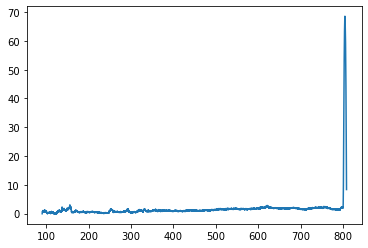

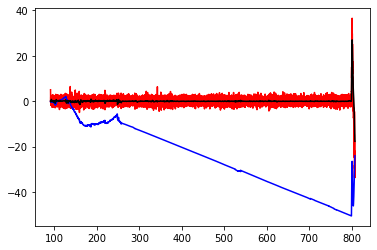

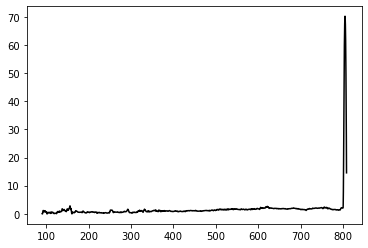

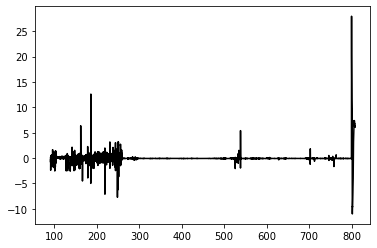

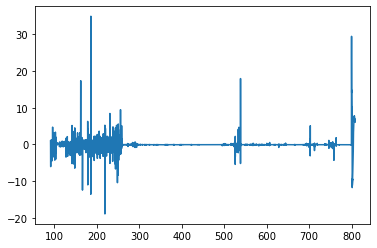

In [50]:
plt.plot(Time, Alt)
plt.show()
plt.plot(Time[:-1], V_Baro, 'r')
plt.plot(Time, V_Acc, 'b')
plt.plot(Time[:-1], Vel_pred, 'k')
plt.show()
plt.plot(Time[:-1], Alt_pred, 'k')
plt.show()
plt.plot(Time[:-1], Acc_pred, 'k')
plt.show()
plt.plot(Time, Acc_Z)
plt.show()